# Topic Modeling

Before we start, thanks to [LazyPanda](https://www.kaggle.com/runesh) for introducing topic modeling to me, I thought it was really cool to learn. Also be sure to check out the [dataset](https://www.kaggle.com/brendan45774/pokmon-index-database) that I used which is [Pokémon Index!](https://www.kaggle.com/brendan45774/pokmon-index-database)

Topic Modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. They are also referred to as probabilistic topic models, which refers to statistical algorithms for discovering the latent semantic structures of an extensive text body. Topic modeling is also an unsupervised technique that intends to analyze large volumes of text data by clustering the documents into groups.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import random

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Inspecting data

In [ ]:
df = pd.read_csv('../input/pokmon-index-database/moves.csv')
df = df.head(20000)
df.dropna()

In [ ]:
df.head()

In [ ]:
df['Effect'][350]

In [ ]:
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df['Effect'].values.astype('U'))

In [ ]:
doc_term_matrix

In [ ]:
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

In [ ]:
for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

In [ ]:
first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]

In [ ]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

In [ ]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

In [ ]:
df['Topic'] = topic_values.argmax(axis=1)

In [ ]:
df.head()

# NMF for Topic Modeling in Python

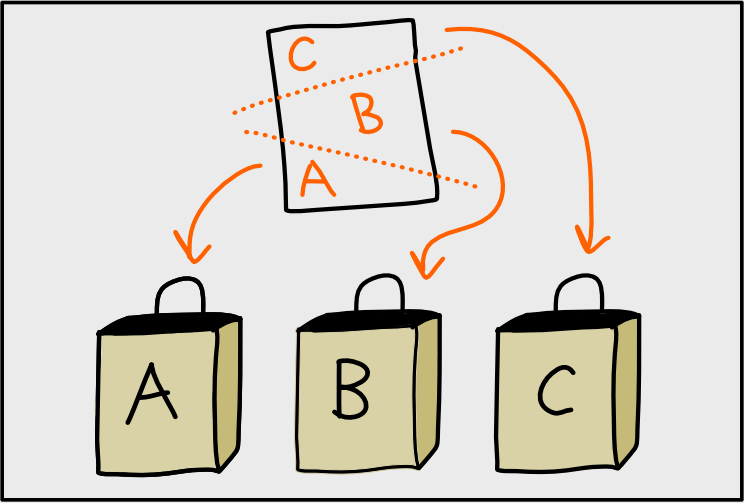

Non-Negative Matrix Factorization (NMF) a supervised learning technique that performs clustering and can do dimensionality reduction. It can be used in combination with TF-IDF scheme to perform topic modeling.

In [ ]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(df['Effect'].values.astype('U'))

In [ ]:
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

In [ ]:
for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

In [ ]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

In [ ]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

In [ ]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

In [ ]:
topic_values = nmf.transform(doc_term_matrix)
df['Topic'] = topic_values.argmax(axis=1)
df.head()

# If you like this notebook, please give an Upvote! Don't forget to check out my other notebooks too!

* [ConnectX Baseline](https://www.kaggle.com/brendan45774/connectx-baseline)
* [Countries Life Expectancy Animation](https://www.kaggle.com/brendan45774/countries-life-expectancy-animation)
* [Data Visuals - Matplotlib](http://www.kaggle.com/brendan45774/data-visuals-matplotlib)
* [Digit Recognizer Solution](http://www.kaggle.com/brendan45774/digit-recognizer-solution)
* [Dictionary and Pandas Cheat sheet](https://www.kaggle.com/brendan45774/dictionary-and-pandas-cheat-sheet)
* [EDA Tutorial Hollywood Movies](https://www.kaggle.com/brendan45774/eda-tutorial-hollywood-movies)
* [Getting started with Matplotlib](http://www.kaggle.com/brendan45774/getting-started-with-matplotlib)
* [Guide to Matplotlib Image](https://www.kaggle.com/brendan45774/guide-to-matplotlib-image)
* [HOG features - Histogram of Oriented Gradients](https://www.kaggle.com/brendan45774/hog-features-histogram-of-oriented-gradients)
* [How to get the lowest score](https://www.kaggle.com/brendan45774/how-to-get-the-lowest-score)
* [House predict solution](http://www.kaggle.com/brendan45774/house-predict-solution)
* [K-Means Clustering (Image Compression)](https://www.kaggle.com/brendan45774/k-means-clustering-image-compression)
* [Kuzushiji-MNIST Panda](http://www.kaggle.com/brendan45774/kuzushiji-mnist-panda)
* [Plotly Coronavirus (Covid-19)](https://www.kaggle.com/brendan45774/plotly-coronavirus-covid-19)
* [Titanic Top Solution](http://www.kaggle.com/brendan45774/titanic-top-solution)
* [Titanic Data Solution](http://www.kaggle.com/brendan45774/titanic-data-solution)
* [Topic Modeling (LDA)](https://www.kaggle.com/brendan45774/topic-modeling-lda)
* [Word Cloud - Analyzing Names](https://www.kaggle.com/brendan45774/word-cloud-analyzing-names)